<a href="https://colab.research.google.com/github/karloxkronfeld/Finanzas/blob/main/RSI_gpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Descargar los datos del SP500
data = yf.download('^GSPC', period="1y", interval="1d")

# Calcular el RSI
window = 14
data['Change'] = data['Close'].diff()
data['Gain'] = data['Change'].where(data['Change'] > 0, 0)
data['Loss'] = -data['Change'].where(data['Change'] < 0, 0)
data['AvgGain'] = data['Gain'].rolling(window).mean()
data['AvgLoss'] = data['Loss'].rolling(window).mean()
data['RS'] = data['AvgGain'] / data['AvgLoss']
data['RSI'] = 100 - (100 / (1 + data['RS']))

# Generar las señales de compra y venta
data['Signal'] = 0
data.loc[(data['RSI'] < 30) & (data['RSI'].shift(1) >= 30), 'Signal'] = 1  # Señal de compra en RSI < 30
data.loc[(data['RSI'] > 70) & (data['RSI'].shift(1) <= 70), 'Signal'] = -1  # Señal de venta en RSI > 70

[*********************100%***********************]  1 of 1 completed


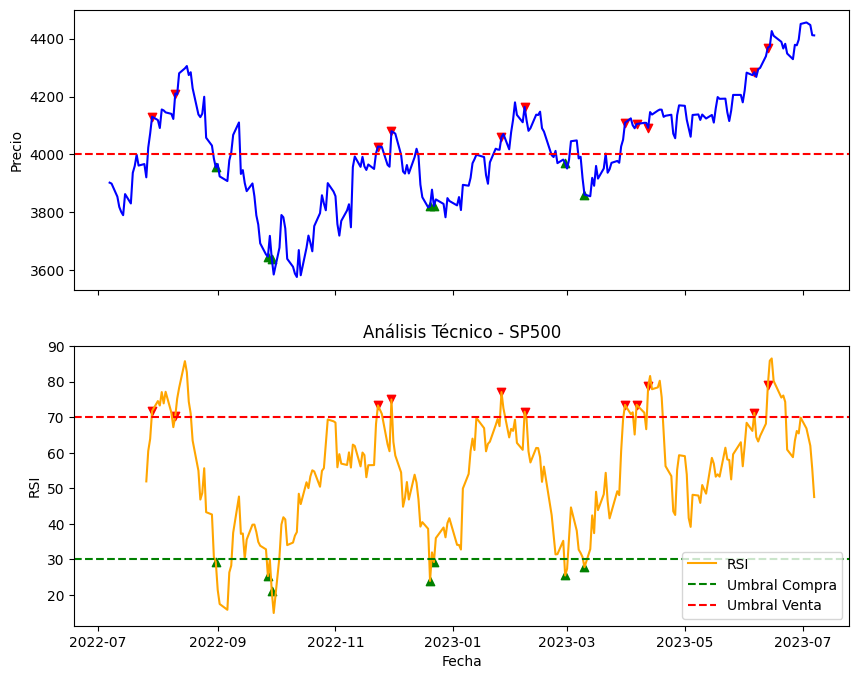

In [24]:
# Configurar el tamaño de la figura y los subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Subplot del precio
ax1.plot(data['Close'], color='blue')
ax1.set_ylabel('Precio')

# Agregar scatter plot para la señal de compra en el gráfico del precio
ax1.scatter(data[data['Signal'] == 1].index, data[data['Signal'] == 1]['Close'], marker='^', color='green', label='Compra')

# Agregar scatter plot para la señal de venta en el gráfico del precio
ax1.scatter(data[data['Signal'] == -1].index, data[data['Signal'] == -1]['Close'], marker='v', color='red', label='Venta')

ax1.axhline(4000, color='red', linestyle='--', label='4000')


# Subplot del RSI y la señal
ax2.plot(data['RSI'], color='orange', label='RSI')
ax2.axhline(30, color='green', linestyle='--', label='Umbral Compra')
ax2.axhline(70, color='red', linestyle='--', label='Umbral Venta')
ax2.set_ylabel('RSI')
ax2.legend()

# Agregar scatter plot para la señal de compra en el gráfico del RSI
ax2.scatter(data[data['Signal'] == 1].index, data[data['Signal'] == 1]['RSI'], marker='^', color='green', label='Compra')

# Agregar scatter plot para la señal de venta en el gráfico del RSI
ax2.scatter(data[data['Signal'] == -1].index, data[data['Signal'] == -1]['RSI'], marker='v', color='red', label='Venta')

# Configurar título y etiquetas de los ejes
plt.title('Análisis Técnico - SP500')
plt.xlabel('Fecha')

# Mostrar el gráfico
plt.show()


[*********************100%***********************]  1 of 1 completed


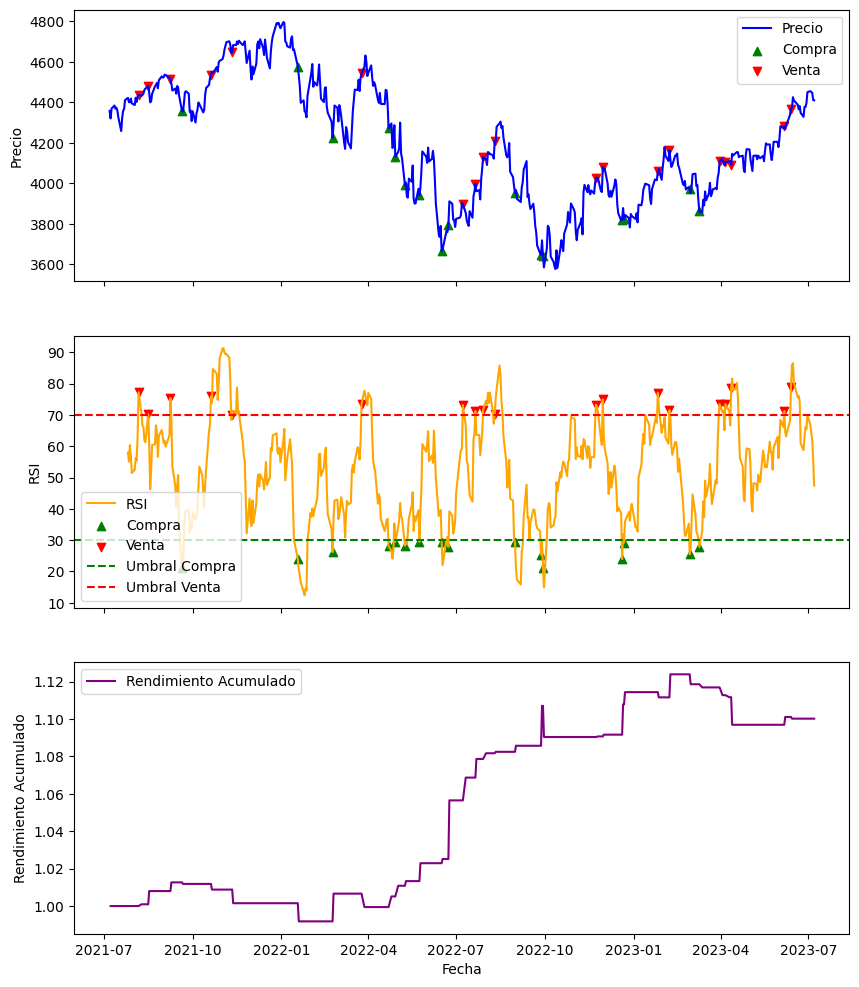

In [28]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Descargar los datos del SP500
data = yf.download('^GSPC', period="2y", interval="1d")

# Calcular el RSI
window = 14
data['Change'] = data['Close'].diff()
data['Gain'] = data['Change'].where(data['Change'] > 0, 0)
data['Loss'] = -data['Change'].where(data['Change'] < 0, 0)
data['AvgGain'] = data['Gain'].rolling(window).mean()
data['AvgLoss'] = data['Loss'].rolling(window).mean()
data['RS'] = data['AvgGain'] / data['AvgLoss']
data['RSI'] = 100 - (100 / (1 + data['RS']))

# Generar las señales de compra y venta
data['Signal'] = 0
data.loc[(data['RSI'] < 30) & (data['RSI'].shift(1) >= 30), 'Signal'] = 1  # Señal de compra en RSI < 30
data.loc[(data['RSI'] > 70) & (data['RSI'].shift(1) <= 70), 'Signal'] = -1  # Señal de venta en RSI > 70

# Calcular el rendimiento acumulado de la estrategia
data['Returns'] = data['Close'].pct_change()
data['Strategy_Returns'] = data['Signal'].shift() * data['Returns']
data['Cumulative_Returns'] = (1 + data['Strategy_Returns']).cumprod()

# Crear los subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Subplot del precio y señales
ax1.plot(data['Close'], color='blue', label='Precio')
ax1.scatter(data[data['Signal'] == 1].index, data[data['Signal'] == 1]['Close'], marker='^', color='green', label='Compra')
ax1.scatter(data[data['Signal'] == -1].index, data[data['Signal'] == -1]['Close'], marker='v', color='red', label='Venta')
ax1.legend()
ax1.set_ylabel('Precio')

# Subplot del RSI y señales
ax2.plot(data['RSI'], color='orange', label='RSI')
ax2.scatter(data[data['Signal'] == 1].index, data[data['Signal'] == 1]['RSI'], marker='^', color='green', label='Compra')
ax2.scatter(data[data['Signal'] == -1].index, data[data['Signal'] == -1]['RSI'], marker='v', color='red', label='Venta')
ax2.axhline(30, color='green', linestyle='--', label='Umbral Compra')
ax2.axhline(70, color='red', linestyle='--', label='Umbral Venta')
ax2.legend()
ax2.set_ylabel('RSI')

# Subplot del rendimiento acumulado
ax3.plot(data['Cumulative_Returns'], color='purple', label='Rendimiento Acumulado')
ax3.legend()
ax3.set_ylabel('Rendimiento Acumulado')
ax3.set_xlabel('Fecha')

# Mostrar las gráficas
plt.show()
